## Part 1
Need Temperature and Pressure Graphs<br>
Need Mass Flow Rate Graph (then integrate under it)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load data
df_1a = pd.read_csv("./data/part1a", sep='\t', header=1, skiprows=2)
df_1b = pd.read_csv("./data/part1b", sep='\t', header=1, skiprows=2)
df_1c = pd.read_csv("./data/part1c", sep='\t', header=1, skiprows=2)
df_1d = pd.read_csv("./data/part1d", sep='\t', header=1, skiprows=2)
df = [df_1a, df_1b, df_1c, df_1d]

display(df[2])

,Time(s),T1(Deg C),Wall Temp(Deg C),Top Plate(Deg C),Bottom Plate(Deg C),P1(PSI),P2(PSI),Mass Flowrate(g/min),Heater Energy (kJ)
0,0.0,32.1,29.8,25.5,22.7,1.2,1.3,0.0,0.0
1,0.1,32.1,29.9,25.5,22.7,1.2,1.5,0.0,0.0
2,0.2,32.1,29.9,25.5,22.7,0.9,1.6,0.0,0.0
3,0.3,32.2,29.8,25.5,22.8,1.2,1.5,0.0,0.0
4,0.4,32.1,29.8,25.6,22.9,1.2,1.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1047,104.7,32.3,29.4,25.7,22.9,40.4,1.8,0.0,0.0
1048,104.8,32.3,29.4,25.7,22.9,40.3,1.8,0.0,0.0
1049,104.9,32.3,29.5,25.7,23.0,40.9,1.6,0.0,0.0
1050,105.0,32.2,29.3,25.5,22.7,40.9,1.6,0.0,0.0


### T1 and P1 vs Time
- conversion information from Fundmantals of Thermal-Fluid Sciences Textbook

3912.3550000000005 Pa



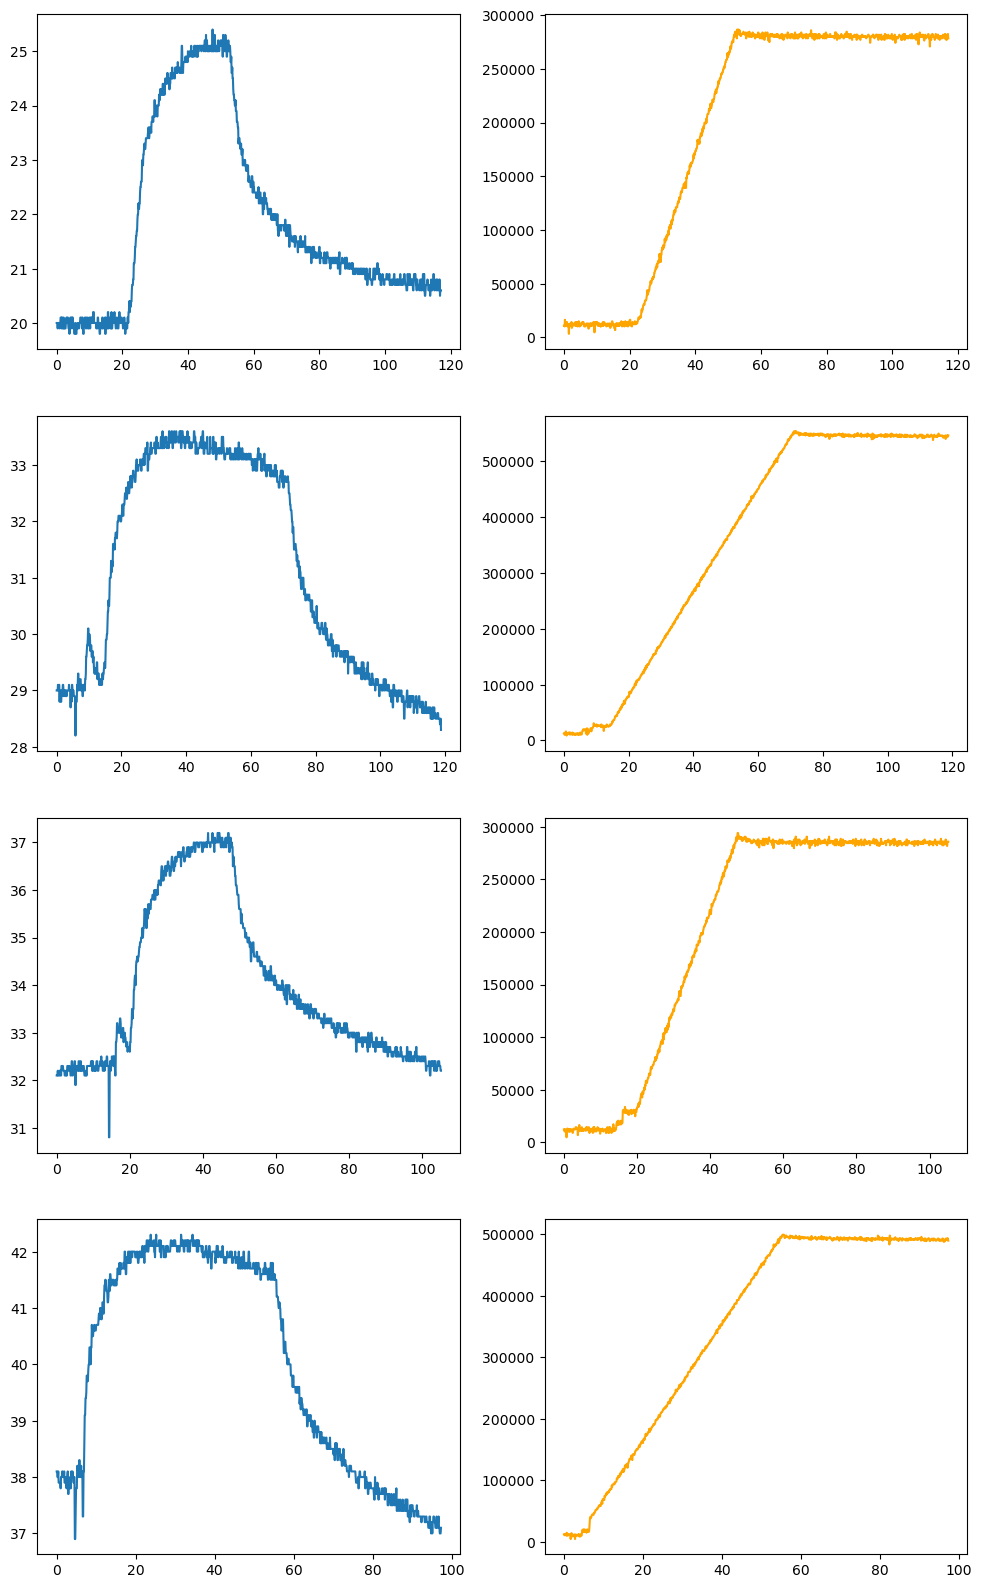

In [22]:
# TODO
# - check if conversions are correct

p_atm = 29.35 # mm Hg?
# convert to Pa
# 1 mm Hg = 0.1333 kPa
p_atm *= 0.1333 * 10**3
print(p_atm, "Pa")
print()

# loop through all
fig, axs = plt.subplots(4, 2)
i = 0
for d in df:
    x = d["Time(s)"].tolist()
    y1 = d["T1(Deg C)"].tolist()
    # convert PSI to Pa, make absolute
    # 1 psi = 6.894757 kPa
    d["P1_abs(Pa)"] = d["P1(PSI)"]*6.894757*10**3 + p_atm
    y2 = (d["P1_abs(Pa)"]).tolist()

    axs[i][0].plot(x, y1)
    axs[i][1].plot(x, y2, "orange")
    #ax.plot(x, y2)

    fig.set_size_inches(12, 20)
    i += 1
    

There is definitely a better way to find the following means and sds but I'm too far in now so whatever

In [23]:
T12 = [[0] * 4 for i in range(2)] # mean 
T12_unc = [[0] * 4 for i in range(2)] # sd
P12 = [[0] * 4 for i in range(2)]
P12_unc = [[0] * 4 for i in range(2)]

In [24]:
def sd(set, mean):
    s = 0
    for i in range(0, len(set)):
        s += (set[i]- mean)**2
    s /= len(set)-1
    s = s**0.5
    return s/(len(set)**0.5)

In [25]:
# part 1a

# T1 ~ 0s-21.5s, T2 ~ row 1142-1171
t = (df[0]["T1(Deg C)"]+273.15).iloc[0:216].tolist()
T12[0][0] = sum(t)/len(t)
T12_unc[0][0] = sd(t, T12[0][0])

t = (df[0]["T1(Deg C)"]+273.15).iloc[1130:1172].tolist()
T12[1][0] = sum(t)/len(t)
T12_unc[1][0] = sd(t, T12[1][0])

# P1 ~ row 0-230, row P2 ~ 538-1171
t = df[0]["P1_abs(Pa)"].iloc[0:231].tolist()
P12[0][0] = sum(t)/len(t)
P12_unc[0][0] = sd(t, P12[0][0])

t = df[0]["P1_abs(Pa)"].iloc[538:1172].tolist()
P12[1][0] = sum(t)/len(t)
P12_unc[1][0] = sd(t, P12[1][0])

print(T12[0][0], "±", T12_unc[0][0])
print(T12[1][0], "±", T12_unc[1][0])
print(P12[0][0], "±", P12_unc[0][0])
print(P12[1][0], "±", P12_unc[1][0])

293.1370370370377 ± 0.006368837826191935
293.8309523809525 ± 0.014554194145511025
12198.002373160176 ± 124.1243237894225
280252.91055867483 ± 66.82704234200533


In [26]:
# part 1b
# T1 ~ row 0-89, T2 ~ row 1163-1187 
t = (df[1]["T1(Deg C)"]+273.15).iloc[0:90].tolist()
T12[0][1] = sum(t)/len(t)
T12_unc[0][1] = sd(t, T12[0][1])

t = (df[1]["T1(Deg C)"]+273.15).iloc[1163:1188].tolist()
T12[1][1] = sum(t)/len(t)
T12_unc[1][1] = sd(t, T12[1][1])

# P1 ~ row 0-58, P2 ~ row 1152-1187
t = df[1]["P1_abs(Pa)"].iloc[0:59].tolist()
P12[0][1] = sum(t)/len(t)
P12_unc[0][1] = sd(t, P12[0][1])

t = df[1]["P1_abs(Pa)"].iloc[1152:1188].tolist()
P12[1][1] = sum(t)/len(t)
P12_unc[1][1] = sd(t, P12[1][1])

print(T12[0][1], "±", T12_unc[0][1])
print(T12[1][1], "±", T12_unc[1][1])
print(P12[0][1], "±", P12_unc[0][1])
print(P12[1][1], "±", P12_unc[1][1])

302.14222222222213 ± 0.015009591421859127
301.6739999999999 ± 0.016613247725837645
12174.377371186438 ± 221.43990580372616
545495.5173500001 ± 262.75999004306294


In [27]:
# part 1c
# T1 ~ rows 0-93, T2 ~ rows 993-1051
t = (df[2]["T1(Deg C)"]+273.15).iloc[0:94].tolist()
T12[0][2] = sum(t)/len(t)
T12_unc[0][2] = sd(t, T12[0][2])

t = (df[2]["T1(Deg C)"]+273.15).iloc[993:1052].tolist()
T12[1][2] = sum(t)/len(t)
T12_unc[1][2] = sd(t, T12[1][2])

# P1 ~ rows 0-143, P2 ~ rows 950-1052
t = df[2]["P1_abs(Pa)"].iloc[0:144].tolist()
P12[0][2] = sum(t)/len(t)
P12_unc[0][2] = sd(t, P12[0][2])

t = df[2]["P1_abs(Pa)"].iloc[950:1053].tolist()
P12[1][2] = sum(t)/len(t)
P12_unc[1][2] = sd(t, P12[1][2])

print(T12[0][2], "±", T12_unc[0][2])
print(T12[1][2], "±", T12_unc[1][2])
print(P12[0][2], "±", P12_unc[0][2])
print(P12[1][2], "±", P12_unc[1][2])

305.37127659574463 ± 0.010893752858910085
305.49237288135583 ± 0.012838835972175382
11702.472804861114 ± 141.40627822207975
284819.6262245095 ± 134.9853581870077


In [28]:
# part 1d
# T1 ~ rows 0-69, T2 ~ rows 937-973
t = (df[3]["T1(Deg C)"]+273.15).iloc[0:70].tolist()
T12[0][3] = sum(t)/len(t)
T12_unc[0][3] = sd(t, T12[0][3])

t = (df[3]["T1(Deg C)"]+273.15).iloc[937:974].tolist()
T12[1][3] = sum(t)/len(t)
T12_unc[1][3] = sd(t, T12[1][3])

# P1 ~ rows 0-45, P2 rows 949-973
t = df[3]["P1_abs(Pa)"].iloc[0:46].tolist()
P12[0][3] = sum(t)/len(t)
P12_unc[0][3] = sd(t, P12[0][3])

t = df[3]["P1_abs(Pa)"].iloc[949:974].tolist()
P12[1][3] = sum(t)/len(t)
P12_unc[1][3] = sd(t, P12[1][3])

print(T12[0][3], "±", T12_unc[0][3])
print(T12[1][3], "±", T12_unc[1][3])
print(P12[0][3], "±", P12_unc[0][3])
print(P12[1][3], "±", P12_unc[1][3])

311.0814285714286 ± 0.030560184461118512
310.3040540540541 ± 0.01530206103735345
10942.00941956522 ± 285.62366718712155
490461.566976 ± 317.7578004788217


### mass flow rate graph
- integrate under it

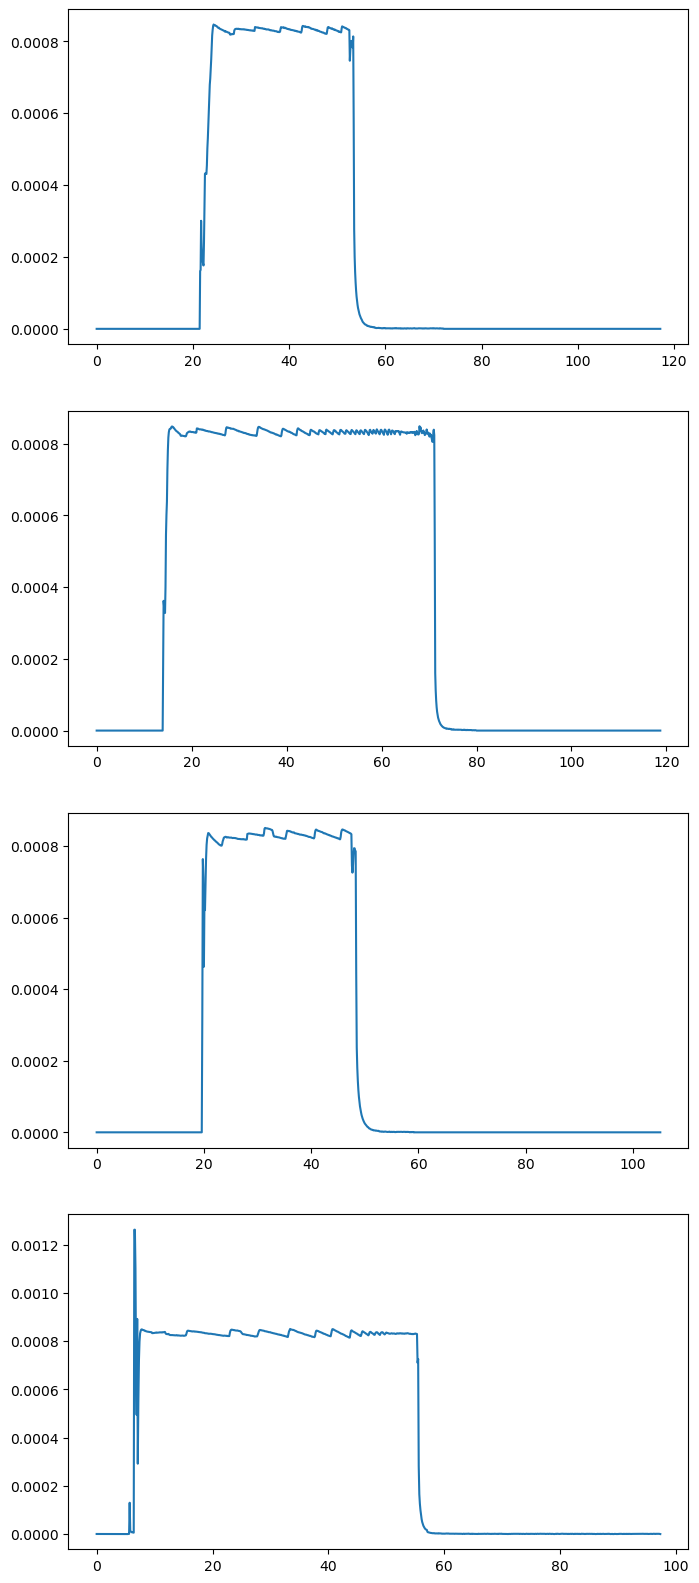

In [32]:
# plot them (to figure out bounds, judge if it looks correct)

# loop through all
fig, axs = plt.subplots(4, 1)
i = 0
for d in df:
    x = d["Time(s)"].tolist()

    # convert to g/min -> kg/s
    d["MFR (kg/s)"] = d["Mass Flowrate(g/min)"]*10**(-3)*60**(-1)
    y = d["MFR (kg/s)"].tolist()

    axs[i].plot(x, y)
    #ax.plot(x, y2)

    fig.set_size_inches(8, 20)
    i += 1

In [48]:
m_in = [0]*4

for i in range(0, len(m_in)):
    x = df[i]["Time(s)"].tolist()
    y = df[i]["MFR (kg/s)"].tolist()
    m_in[i] = np.trapz(y, x, dx=1)

print(m_in)

# I HOPE THIS IS RIGHT, FIGURE OUT ERROR!
# - okay so apparently the best way to do error is to
#   manually do trapezoid rule and error propogation
#   with it

[0.025768716666666663, 0.047370833333333334, 0.023806383333333327, 0.040991733333333336]


In [61]:
# keeping the previous cell to confirm trapezoid rule was
#   executed correctly
def trapezoid(y, x, y_unc, x_unc):
    # trapezoid rule
    s_i = [0] * (len(y)-1)
    s = 0
    for i in range(0, len(y)-1):
        s_i[i] = 1/2 * (y[i] + y[i+1]) * (x[i+1] - x[i])
    s = sum(s_i)

    # uncertainty propogation
    s_unci = [0] * (len(y)-1)
    s_unc = 0
    # individual areas
    for i in range(0, len(y)-1):
        d1 = (y[i] + y[i+1])**2
        y_t = 0
        if d1 != 0:
            y_t = (y_unc[i]**2 + y_unc[i+1]**2)/d1

        d2 = (x[i+1] - x[i])**2
        x_t = 0
        if d2 != 0:
            x_t = (x_unc[i]**2 + x_unc[i+1]**2)/d2
        
        s_unci[i] = s_i[i] * (y_t + x_t)**0.5
    # adding areas together
    for i in range(0, len(s_unci)):
        s_unc += s_unci[i]**2
    s_unc = s_unc**0.5
    
    return s, s_unc

min_unc = [0]*4
for i in range(0, len(m_in)):
    
    x = df[i]["Time(s)"].tolist()
    x_unc = [0.01] * len(x)
    
    y = df[i]["MFR (kg/s)"].tolist()
    y_unc = [0] * len(y)
    for j in range(0, len(y)):
        old_y = df[i]["Mass Flowrate(g/min)"].tolist()[j]
        if old_y != 0:
            y_unc[j] = y[j] * 0.01/old_y
        else:
            y_unc[j] = 0
    
    m_in[i], min_unc[i] = trapezoid(y, x, y_unc, x_unc)

print(m_in)
print(min_unc)

[0.025768716666666646, 0.04737083333333333, 0.023806383333333344, 0.04099173333333349]
[0.00020462934191416005, 0.0002799531739862935, 0.00019739570457163807, 0.0002608429310694251]


### Calculate mass of left tank
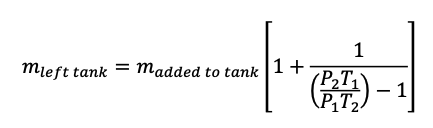

In [64]:
# check values
print(P12)
print(P12_unc)
print()
print(T12)
print(T12_unc)
print()
print(m_in)
print(min_unc)
print()

[[12198.002373160176, 12174.377371186438, 11702.472804861114, 10942.00941956522], [280252.91055867483, 545495.5173500001, 284819.6262245095, 490461.566976]]
[[124.1243237894225, 221.43990580372616, 141.40627822207975, 285.62366718712155], [66.82704234200533, 262.75999004306294, 134.9853581870077, 317.7578004788217]]

[[293.1370370370377, 302.14222222222213, 305.37127659574463, 311.0814285714286], [293.8309523809525, 301.6739999999999, 305.49237288135583, 310.3040540540541]]
[[0.006368837826191935, 0.015009591421859127, 0.010893752858910085, 0.030560184461118512], [0.014554194145511025, 0.016613247725837645, 0.012838835972175382, 0.01530206103735345]]

[0.025768716666666646, 0.04737083333333333, 0.023806383333333344, 0.04099173333333349]
[0.00020462934191416005, 0.0002799531739862935, 0.00019739570457163807, 0.0002608429310694251]



In [71]:
mleft = [0] * 4
mleft_unc = [0] * 4

for i in range(0, 4):
    # value
    frac = (P12[1][i]*T12[0][i]) / (P12[0][i]*T12[1][i])
    mleft[i] = m_in[i] * (1 + 1/(frac - 1))

    # uncertainties
    frac_unc = frac * ((P12_unc[1][i]/P12[1][i])**2
                     + (T12_unc[0][i]/T12[0][i])**2 
                     + (P12_unc[0][i]/P12[0][i])**2
                     + (T12_unc[1][i]/T12[1][i])**2)**0.5
    t0_unc = 1/(frac - 1) * frac_unc/frac
    t0 = 1 + 1/(frac - 1)
    mleft_unc[i] = mleft[i] * ((min_unc[i]/m_in[i])**2 + (t0_unc/t0)**2)**0.5
    

print(mleft)
print(mleft_unc)

[0.026944240325740044, 0.04845047611455673, 0.024826856647408406, 0.041924720442486546]
[0.00021429847607107994, 0.00028700676704119095, 0.00020622672937066665, 0.0002678898442682001]


## Part 2
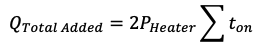

Use that formula<br>
Maybe plot temperature and heater energy to figure out when the power is actually for maintaining the temperature? Also we need input power so figure out a way to get that from the heater energy data collected.

In [72]:
# load data
df_1a = pd.read_csv("./data/part2a", sep='\t', header=1, skiprows=2)
df_1b = pd.read_csv("./data/part2b", sep='\t', header=1, skiprows=2)
df_1c = pd.read_csv("./data/part2c", sep='\t', header=1, skiprows=2)
df_1d = pd.read_csv("./data/part2d", sep='\t', header=1, skiprows=2)
df = [df_1a, df_1b, df_1c, df_1d]

display(df[2])

,Time(s),T1(Deg C),Wall Temp(Deg C),Top Plate(Deg C),Bottom Plate(Deg C),P1(PSI),P2(PSI),Mass Flowrate(g/min),Heater Energy (kJ)
0,0.0,31.7,29.2,25.4,22.8,40.3,1.8,0.0,0.0
1,0.1,31.6,29.3,25.6,22.8,39.8,1.6,0.0,0.0
2,0.2,31.6,29.3,25.6,22.8,40.7,1.9,0.0,0.0
3,0.3,31.6,29.4,25.7,22.9,40.7,2.1,0.0,0.0
4,0.4,31.6,29.3,25.6,22.9,40.6,2.1,0.0,0.0
...,...,...,...,...,...,...,...,...,...
4111,411.1,59.1,36.2,28.8,24.0,45.3,1.8,0.0,170.0
4112,411.2,59.1,36.2,28.8,24.0,44.7,1.9,0.0,170.0
4113,411.3,59.1,36.3,28.9,24.1,45.2,2.1,0.0,170.0
4114,411.4,59.1,36.3,28.9,24.1,44.6,1.8,0.0,170.2


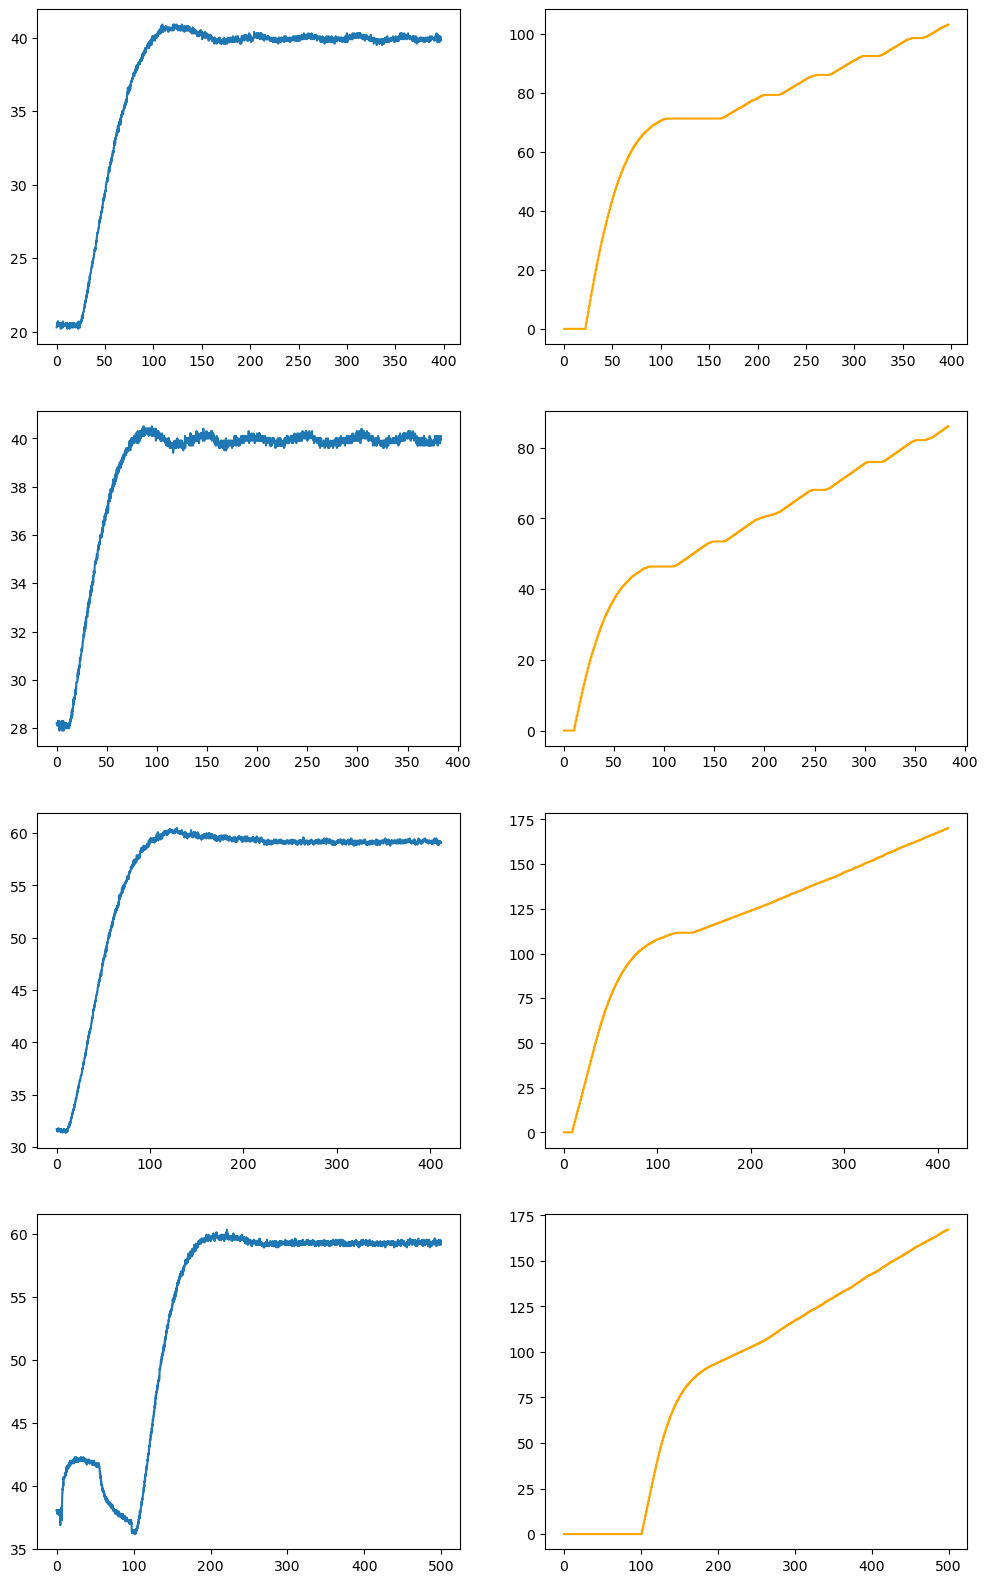

In [84]:
# plot to get a sense of what's going on
# loop through all
fig, axs = plt.subplots(4, 2)
i = 0
for d in df:
    x = d["Time(s)"].tolist()
    y1 = d["T1(Deg C)"].tolist()
    y2 = (d["Heater Energy (kJ)"]).tolist()

    axs[i][0].plot(x, y1)
    axs[i][1].plot(x, y2, "orange")
    #ax.plot(x, y2)

    fig.set_size_inches(12, 20)
    i += 1

Tried out this interesting idea where I use `curve_fit` for less and less points to see where the error is minimized but it turns out that's just at the second-last point so we will just eyeball it

In [135]:
# figure out where the temperature stabilizes
s = [1650, 980, 3048, 2700]

Code for kind of playing around and figuring out the rough cutoffs for above
```python
fig, ax = plt.subplots()
x = df[3]["Time(s)"].tolist()    
y = df[3]["T1(Deg C)"].tolist()

display(df[3]["T1(Deg C)"].iloc[2700:2730])
display(df[3]["T1(Deg C)"].tail(10))
ax.plot(x, y)
ax.axvline(270)
print(popt)
print(ts)
```

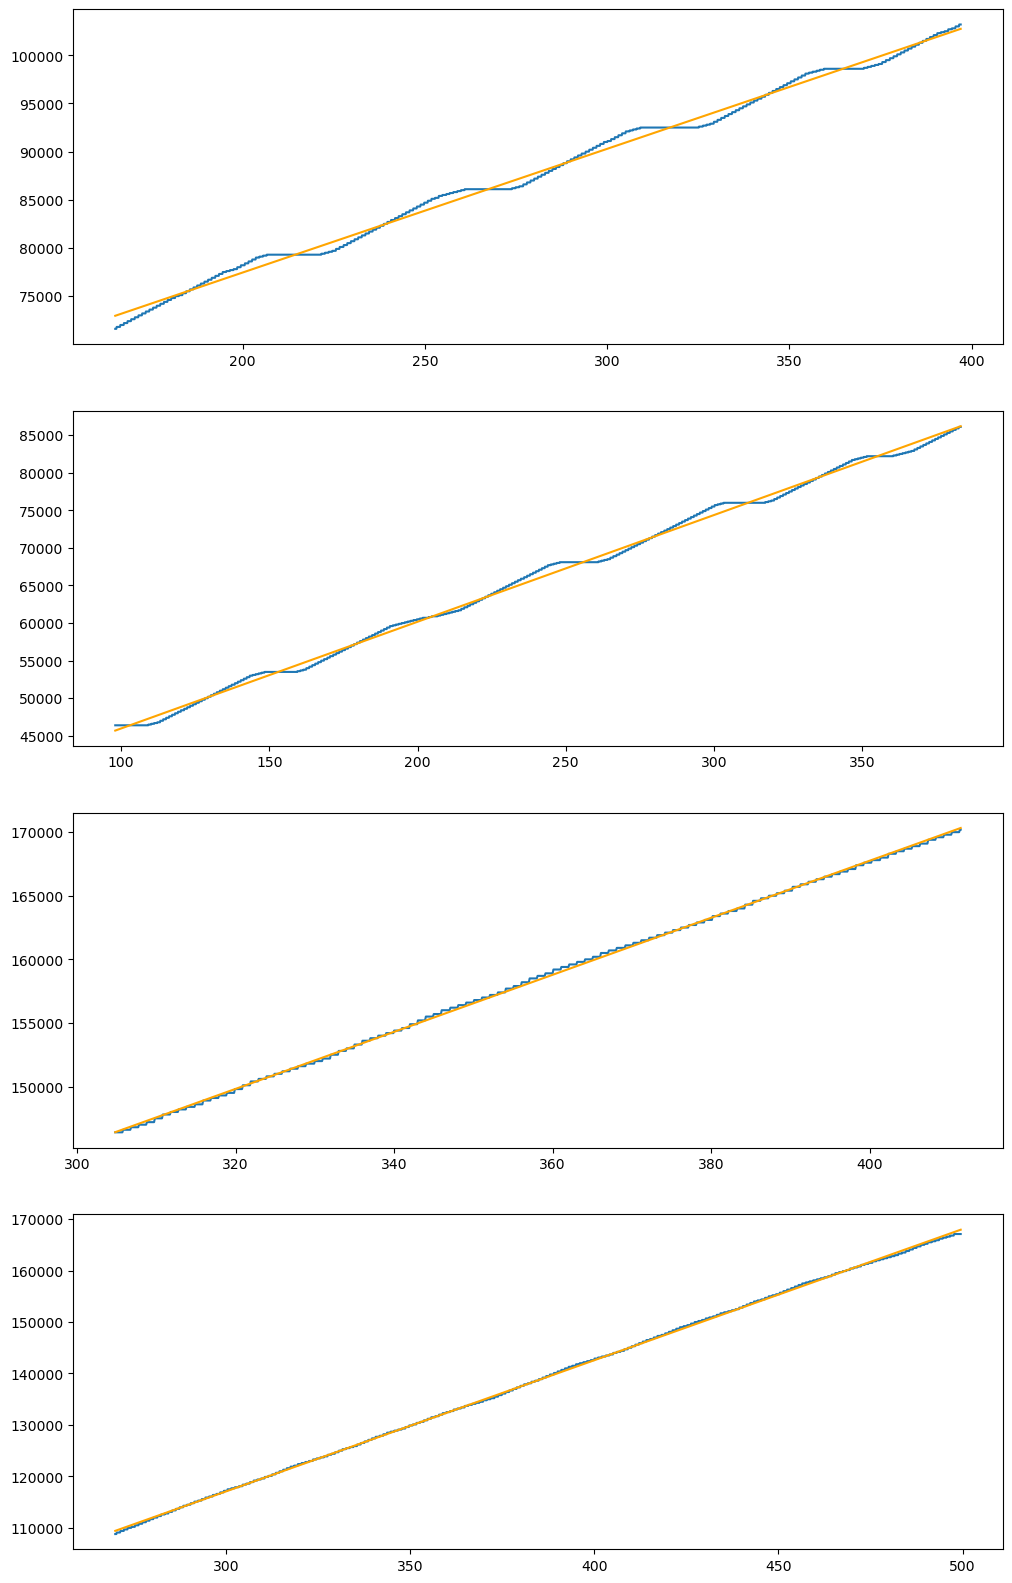

In [148]:
# find the power by fitting a straight line and finding the slope
# - unc can also be found with the fit if using curve_fit

from scipy.optimize import curve_fit

p = [0] * 4
p_unc = [0] * 4
ton = [0] * 4
def line(x, m, b):
    return m*x + b

i = 0
fig, axs = plt.subplots(4, 1)
for d in df:
    x = np.array(d["Time(s)"].tolist()[s[i]:])
    ton[i] = len(x)/10
    y = np.array((d["Heater Energy (kJ)"] * 10**3).tolist()[s[i]:])

    axs[i].plot(x, y)
    
    popt, pcov = curve_fit(line, x, y)
    p[i] = popt[0] # only want slope
    p_unc[i] = np.sqrt(np.diag(pcov))[0]
    axs[i].plot(x, line(x, *popt), color="orange")
    
    fig.set_size_inches(12, 20)
    i += 1

In [149]:
print(ton)
print(p)
print(p_unc)

[232.1, 285.4, 106.8, 229.6]
[128.4146924615575, 141.9231937207406, 224.1499709931819, 254.9718071137848]
[0.19301946125792305, 0.13275564400937362, 0.1463770021563389, 0.0733690184059445]


In [156]:
Q = [0] * len(p)
Q_unc = [0] * len(Q)
for i in range(0, len(p)):
    Q[i] = 2 * p[i] * ton[i]

    # CALCULATE UNC
    # - p_unc is above, you can calculate ton_unc
    #   by going back to where you chose the ranges
    #   and figuring out an interval where it would
    #   have been alright
    
print(Q)

[59610.100240654996, 81009.75897579873, 47878.43380414366, 117083.05382664998]
